## Respiratory disease analysis MA
* Respiratory disease data MA analysis to understand disease burden
* Date: 27 June 24
* Mala Chaurasia


In [1]:
# PMDARIMA Incompatibility with numpy now. Hence to resolve older version of numpy on colab.
# https://stackoverflow.com/questions/78765325/numpy-dtype-size-changed-may-indicate-binary-incompatibility-expected-96-from
# Install older verion
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Time series
# importing libraries
from statsmodels.tsa.stattools import adfuller
import openpyxl
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
# Disallow display of convergence messages.
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

from typing import Union
from tqdm import tqdm_notebook
from statsmodels.stats.diagnostic import acorr_ljungbox

# Importing three sets of data
* Wastewater time series analysis
* Flu time series analysis
* Analysing correlation of respiratory viarl diseaes: covid &  wastewater, covid & influeza with vaccine

# Time series analysis

In [3]:
# Importing last preprocssed data
Covid_series=pd.read_csv('Covid_series.csv', index_col=0)

In [4]:
Covid_series.head()

,Season,Visit type,Week Start Date,Week End Date,Total visits,Percent of visits for acute respiratory diseases,Percent of all visits for COVID-19,Percent of all visits for influenza,Percent of all visits for RSV,Last updated,covid_numbers,rsv_numbers,influenza_numbers
0,2023-2024,ED visits,2023-07-02,2023-07-08,65444,0.082,0.005,0.001,0.000,2024-05-23,3.0,0.0,1.0
1,2023-2024,ED visits,2024-02-04,2024-02-10,64281,0.164,0.019,0.030,0.002,2024-05-23,12.0,1.0,19.0
2,2023-2024,ED visits,2023-08-20,2023-08-26,64582,0.094,0.018,0.001,0.000,2024-05-23,12.0,0.0,1.0
3,2023-2024,ED visits,2023-12-10,2023-12-16,67477,0.187,0.030,0.021,0.014,2024-05-23,20.0,9.0,14.0
4,2023-2024,ED visits,2023-12-17,2023-12-23,66234,0.205,0.037,0.032,0.012,2024-05-23,25.0,8.0,21.0


* Observations: The seasonality is captured yearly. Every year begining date shifts by a month in dataset.

In [5]:
Covid_series['Week Start Date'].value_counts()

Week Start Date
2023-07-02    2
2021-09-26    2
2022-09-25    2
2021-10-17    2
2023-05-14    2
             ..
2020-08-09    2
2023-04-02    2
2020-06-21    2
2020-04-05    2
2019-12-08    2
Name: count, Length: 255, dtype: int64

In [6]:
Covid_series['Week End Date'].value_counts()

Week End Date
2023-07-08    2
2021-10-02    2
2022-10-01    2
2021-10-23    2
2023-05-20    2
             ..
2020-08-15    2
2023-04-08    2
2020-06-27    2
2020-04-11    2
2019-12-14    2
Name: count, Length: 255, dtype: int64

In [7]:
Covid_series['Visit type'].value_counts()

Visit type
ED visits     255
Admissions    255
Name: count, dtype: int64

In [8]:
# Merging the visit types and summing up the counts for a single date series.
Covid_series_dated=Covid_series[['Season', 'Week Start Date','Week End Date', 'covid_numbers', 'rsv_numbers', 'influenza_numbers']].groupby(['Season','Week Start Date','Week End Date']).sum(['covid_numbers', 'rsv_numbers', 'influenza_numbers']).reset_index()

In [9]:
Covid_series_dated.Season.value_counts()


Season
2020-2021    53
2019-2020    52
2021-2022    52
2022-2023    52
2023-2024    46
Name: count, dtype: int64

### Begin and end weeks for each season

In [10]:
#
print("2020-2021 season")
print(Covid_series_dated[(Covid_series_dated['Season']=='2020-2021')][['Week Start Date', 'Week End Date']].head(1))
print(Covid_series_dated[(Covid_series_dated['Season']=='2020-2021')][['Week Start Date', 'Week End Date']].tail(1))

2020-2021 season
   Week Start Date Week End Date
52      2020-06-28    2020-07-04
    Week Start Date Week End Date
104      2021-06-27    2021-07-03


In [11]:
#
print("2021-2022 season")
print(Covid_series_dated[(Covid_series_dated['Season']=='2021-2022')][['Week Start Date', 'Week End Date']].head(1))
print(Covid_series_dated[(Covid_series_dated['Season']=='2021-2022')][['Week Start Date', 'Week End Date']].tail(1))


2021-2022 season
    Week Start Date Week End Date
105      2021-07-04    2021-07-10
    Week Start Date Week End Date
156      2022-06-26    2022-07-02


In [12]:
#
print("2022-2023 season")
print(Covid_series_dated[(Covid_series_dated['Season']=='2022-2023')][['Week Start Date', 'Week End Date']].head(1))
print(Covid_series_dated[(Covid_series_dated['Season']=='2022-2023')][['Week Start Date', 'Week End Date']].tail(1))


2022-2023 season
    Week Start Date Week End Date
157      2022-07-03    2022-07-09
    Week Start Date Week End Date
208      2023-06-25    2023-07-01


In [13]:
#
print("2023-2024 season")
print(Covid_series_dated[(Covid_series_dated['Season']=='2023-2024')][['Week Start Date', 'Week End Date']].head(1))
print(Covid_series_dated[(Covid_series_dated['Season']=='2023-2024')][['Week Start Date', 'Week End Date']].tail(1))


2023-2024 season
    Week Start Date Week End Date
209      2023-07-02    2023-07-08
    Week Start Date Week End Date
254      2024-05-12    2024-05-18


### The seasonality trend is of 52 records. from month 07 -month 07 of next year. The first record needs to be dropped.

In [14]:
Covid_series_dated.head()

,Season,Week Start Date,Week End Date,covid_numbers,rsv_numbers,influenza_numbers
0,2019-2020,2019-06-30,2019-07-06,0.0,0.0,0.0
1,2019-2020,2019-07-07,2019-07-13,0.0,0.0,0.0
2,2019-2020,2019-07-14,2019-07-20,0.0,0.0,0.0
3,2019-2020,2019-07-21,2019-07-27,0.0,0.0,0.0
4,2019-2020,2019-07-28,2019-08-03,0.0,0.0,0.0


In [15]:
# Dropping the first record of 2019-06-30 to 2019-07-06 and making series with perfect 52 seasons each.
Covid_series_dated=Covid_series_dated.drop(index=[0]).reset_index(drop=True)

In [16]:
Covid_series_dated.to_csv('Covid_series_dated.csv')

In [17]:
# Setting weekend date as index
# Covid_series_dated=Covid_series_dated.set_index('Week End Date', drop=True)

In [18]:
Covid_series_dated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             254 non-null    object 
 1   Week Start Date    254 non-null    object 
 2   Week End Date      254 non-null    object 
 3   covid_numbers      254 non-null    float64
 4   rsv_numbers        254 non-null    float64
 5   influenza_numbers  254 non-null    float64
dtypes: float64(3), object(3)
memory usage: 12.0+ KB


## Taking season 2023-2-24 as our horizon for prediction
### Naive methods for initial analysis

In [19]:
train=Covid_series_dated[:-47]
test=Covid_series_dated[-47:]

In [20]:
## Spliting data into test and train set
train.shape, test.shape

((207, 6), (47, 6))

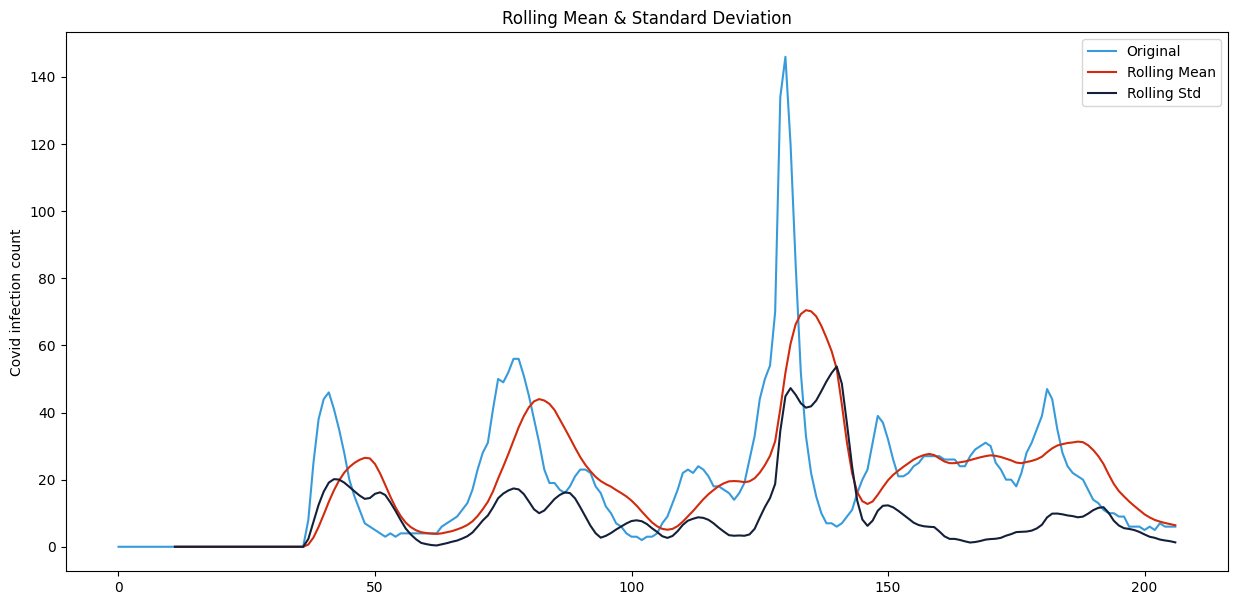

In [21]:
# Determine rolling stats for covid numbers
#Determine rolling statistics
train["rolling_avg"] = train["covid_numbers"].rolling(window=12).mean() #window size 12 denotes 12 weeks, giving rolling mean at weekly level
train["rolling_std"] = train["covid_numbers"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(train["covid_numbers"], color='#379BDB', label='Original')
plt.plot(train["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(train["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.ylabel('Covid infection count')
plt.show(block=False)

### Mean and variance are changing. The data has been collected for a yearly cycle and set comprises of 52 per year.

In [22]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
# Mean base model using historical data
historical_mean = np.mean(train['covid_numbers'])

# Forecasting this for each instance in horizon
test.loc[:, 'pred_mean_covid_num']=historical_mean

# The performance
mape_hist_mean = mape(test['covid_numbers'], test['pred_mean_covid_num'])



In [24]:
## Forecasting using last years mean
last_year_mean = np.mean(train['covid_numbers'][-52:])


# Forecasting horizon using last year mean
test.loc[:, 'pred__last_yr_mean_covind_num'] = last_year_mean

mape_last_year_mean = mape(test['covid_numbers'], test['pred__last_yr_mean_covind_num'])


In [25]:
## Forecasting using last value
last = train['covid_numbers'].iloc[-1]

# Forecasting horizon using last value
test.loc[:, 'pred_last_val_covid_num'] = last

mape_last = mape(test['covid_numbers'], test['pred_last_val_covid_num'])


In [26]:
## Forecasting with naiive seasonal
test['naive_seasonal'] = train['covid_numbers'].iloc[160:207].values

In [27]:
Covid_series_dated.columns

Index(['Season', 'Week Start Date', 'Week End Date', 'covid_numbers',
       'rsv_numbers', 'influenza_numbers'],
      dtype='object')

### The mean and variance are changing.

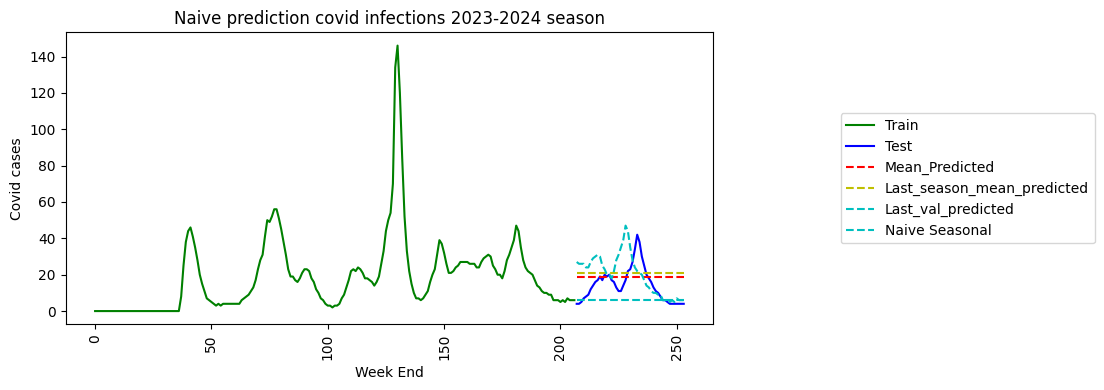

In [28]:
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True
Train, = plt.plot( train['covid_numbers'], 'g-', label='Train')
Test,= plt.plot( test['covid_numbers'], 'b-', label='Test')
Mean_predicted, =plt.plot( test['pred_mean_covid_num'], 'r--', label='Mean_Predicted')
Last_season_mean_predicted,= plt.plot(test['pred__last_yr_mean_covind_num'], 'y--', label='Last_season_mean_predicted')
Last_val_predicted=plt.plot( test['pred_last_val_covid_num'], 'c--', label='Last_val_predicted')
Seasonal_last_predicted=plt.plot( test['naive_seasonal'], 'c--', label='Naive Seasonal')
plt.title("Naive prediction covid infections 2023-2024 season")
plt.xlabel('Week End')
plt.xticks(rotation=90)
plt.ylabel('Covid cases')
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5));


In [29]:
print('The historical mean:', historical_mean, 'Mean Absolute percentage error in prediction:', mape_hist_mean)
print('Last season mean:', last_year_mean, "Mean Absolute percentage error in prediction:", mape_last_year_mean)
print('Last value of covid infections', last, "Mean Absolute percentage error in prediction:", mape_last )

The historical mean: 18.840579710144926 Mean Absolute percentage error in prediction: 123.05289164035571
Last season mean: 20.846153846153847 Mean Absolute percentage error in prediction: 142.27514173746022
Last value of covid infections 6.0 Mean Absolute percentage error in prediction: 53.79763520196068


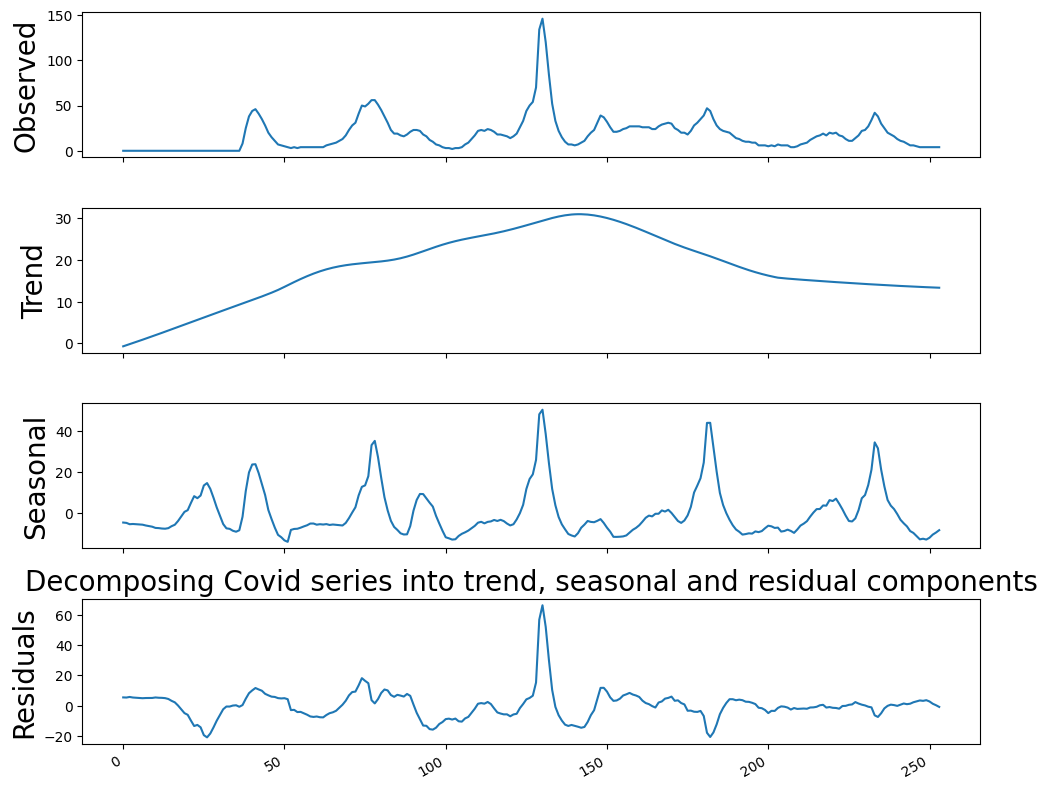

In [30]:
# The decomostion library
from statsmodels.tsa.seasonal import STL

decomposition = STL(Covid_series_dated['covid_numbers'], period=52).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True,
figsize=(10,8))
plt.title("Decomposing Covid series into trend, seasonal and residual components", fontsize=20)

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed', fontsize=20)

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend', fontsize=20)

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal', fontsize=20)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals', fontsize=20)


fig.autofmt_xdate()
plt.tight_layout()

In [31]:
# Testig the covid series for stationarity


ADF_covid_result = adfuller(train['covid_numbers'])

print(f'ADF Statistic: {ADF_covid_result[0]}')
print(f'p-value: {ADF_covid_result[1]}')


ADF Statistic: -4.181715458735899
p-value: 0.0007074647484000106


* The series is stationary as P value is less than 0.01, the null hypothesis can be rejected, which is the series is not stationary.

* Next we will check if it can be aproximated with MA/AR models

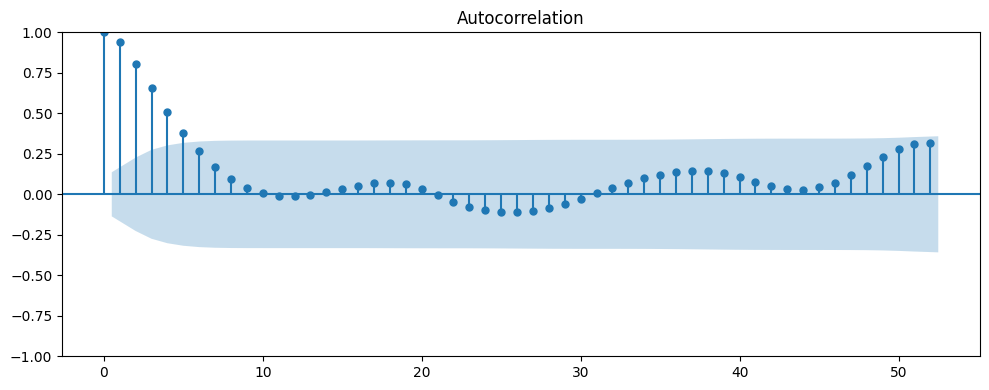

In [32]:
# Autocorrelation of series. Current vs past values relationship, we have taken a lag of full season with 52 samples.
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train['covid_numbers'], lags=52);

* The auto-corelation shows 4 lags and small sinosoidal coefficients. Next we will plot PACF to verify how well it can be approximated with AR for the sinosoidal component

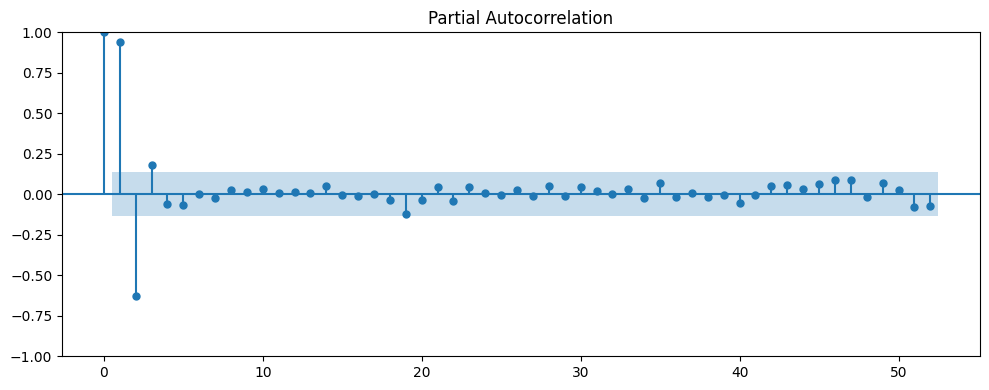

In [33]:
# Partial autocorrelation of series. Current vs past values relationship, we have taken a lag of full season with 52 samples.
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(train['covid_numbers'], lags=52);

plt.tight_layout()

* The lags 1 & 2 show coefficients, rest are very small. The best option would be to use multiple parameters and find out best model parameters.

### Time series analysis

In [34]:
### The function for finding best AIC with different parameters


def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(
                endog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

## Using auto_arima

In [35]:

# Standard ARIMA Model


# The following library is now outdated. It works on only older version of numpy==1.26.4
# !pip install pmdarima
# import pmdarima as pm


#ARIMA_model = pm.auto_arima(train['covid_numbers'],
#                      start_p=1,
#                      start_q=1,
#                      test='adf', # use adftest to find optimal 'd'
#                      max_p=52, max_q=52, # maximum p and q
#                     m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
#                      d=None,# let model determine 'd'
#                      seasonal=False, # No Seasonality for standard ARIMA
#                      trace=False, #logs
#                      error_action='warn', #shows errors ('ignore' silences these)
#                      suppress_warnings=True,
#                      stepwise=True)



In [36]:
# ARIMA_model
# Best parameters acheived: ARIMA(2,0,1)(0,0,0)[0] intercept

In [37]:
## Fitting the model with best parameters identified in the above 2 iterations
ARIMA_model = SARIMAX(train['covid_numbers'], order=(2,0,1), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

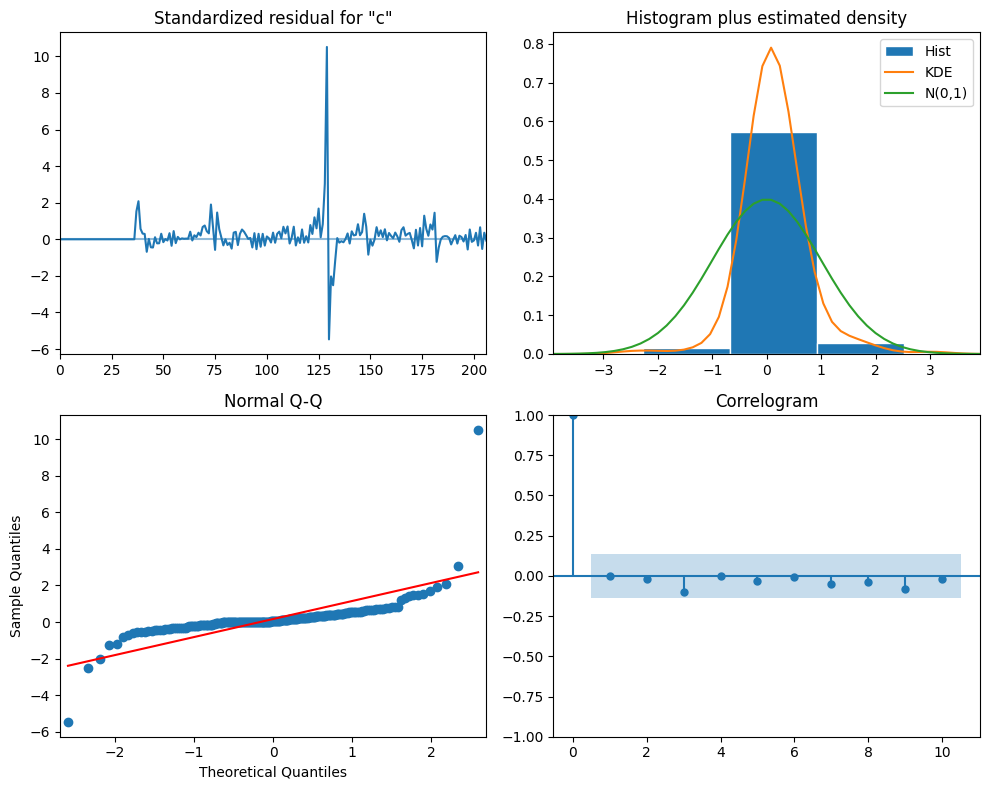

In [38]:
# Residuals
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

In [39]:
# AIC of the model
ARIMA_model_fit.aic

1286.333373504653

In [40]:
# The residual tests

residuals = ARIMA_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 200, 1))

,lb_stat,lb_pvalue
1,0.002239,0.962262
2,0.089624,0.956177
3,2.349389,0.503125
4,2.349411,0.671788
5,2.552150,0.768621
...,...,...
195,65.587083,1.000000
196,65.591698,1.000000
197,65.597342,1.000000
198,65.598863,1.000000


In [41]:
## Rolling forecast for ARIMA model
def rolling_forecast_arima(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    end_idx = train_len

    if method == 'last_season':
        pred_last_season = []

        for i in range(train_len, total_len, window):
            last_season = df['covid_numbers'][i-window:i].values
            pred_last_season.extend(last_season)

        return pred_last_season

    elif method == 'ARIMA':
        pred_ARIMA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df['covid_numbers'][:i], order=(2,0,1), seasonal_order=(0,0,0,52), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(end_idx, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARIMA.extend(oos_pred)

        return pred_ARIMA

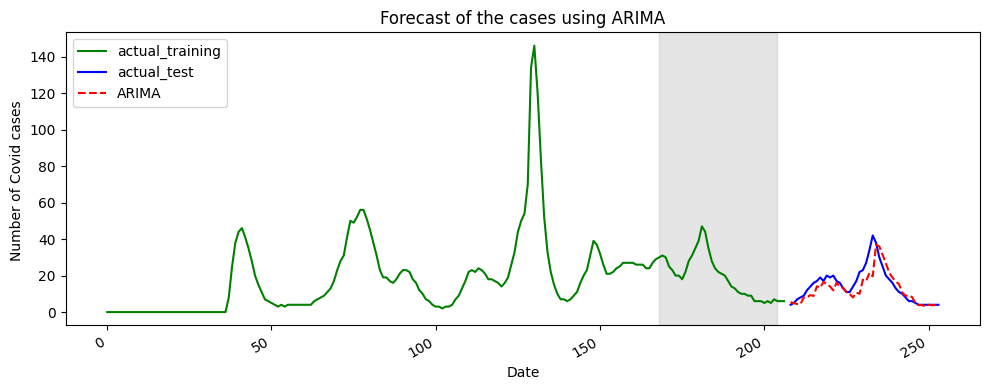

In [42]:
# Defining the parameters for forecasting
train.shape[0],test.shape[0]

pred_df = test[-46:]


pred_df['arima']=rolling_forecast_arima(Covid_series_dated, train.shape[0], 45, 2, 'ARIMA')


# ARIMA plot
fig, ax = plt.subplots()
plt.title("Forecast of the cases using ARIMA")

ax.plot(train['covid_numbers'],'g-', label='actual_training')
ax.plot(pred_df['covid_numbers'], 'b-', label='actual_test')
ax.plot(pred_df.arima, 'r--', label='ARIMA')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Covid cases ')
ax.axvspan(168, 204, color='#808080', alpha=0.2)
ax.legend(loc=2)


fig.autofmt_xdate()
plt.tight_layout()


In [43]:
print('The predicted values arima model:\n', pred_df['arima'])

The predicted values arima model:
 208     5.478379
209     4.913674
210     4.416317
211     4.318044
212     8.070327
213     8.023813
214     9.300482
215     8.849911
216    14.142803
217    13.327015
218    16.536616
219    15.318193
220    14.051567
221    11.923202
222    16.110766
223    13.887825
224    13.279166
225    10.863810
226     9.936930
227     8.004879
228    10.757097
229     9.999069
230    17.772241
231    17.035049
232    21.525314
233    19.595576
234    36.861681
235    35.969554
236    31.455974
237    26.760858
238    21.644651
239    18.910078
240    16.802421
241    15.290416
242    10.596296
243     8.924148
244     9.111784
245     8.186952
246     4.685172
247     3.836406
248     3.846292
249     3.117729
250     3.992101
251     3.752293
252     3.850529
253     3.557765
Name: arima, dtype: float64


## SARIMA model , incorporating seasonality


In [44]:


# The following library is now outdated. It works on only older version of numpy==1.26.4
#!pip install pmdarima
#import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
#SARIMA_model = pm.auto_arima(train['covid_numbers'],
#                         start_p=1, start_q=1,
#                         test='adf',
#                         max_p=52, max_q=52,
#                         m=52, # is the frequncy of the cycle
#                         start_P=0,
#                         seasonal=True, #set to seasonal
#                         d=None,
#                         D=1, #order of the seasonal differencing
#                         trace=False,
#                         error_action='ignore',
#                         suppress_warnings=True,
#                         stepwise=True)

In [45]:
# The SARIMA model params.
# We got best parameters: using ARIMA(3,0,0)(2,1,1)[52]
# SARIMA_model

In [46]:
### To insert best value here

SARIMA_model = SARIMAX(train['covid_numbers'], order=(3,0,0), seasonal_order=(2,1,1,52), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

In [47]:
SARIMA_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                        covid_numbers   No. Observations:                  207
Model:             SARIMAX(3, 0, 0)x(2, 1, [1], 52)   Log Likelihood                -480.472
Date:                              Wed, 07 May 2025   AIC                            974.944
Time:                                      07:01:40   BIC                            996.248
Sample:                                           0   HQIC                           983.597
                                              - 207                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7593      0.026     66.581      0.000       1.707       1.811
ar.L2         -1.0328      0.068    -15.088      0.000      -1.167      -0.899
ar.L3          0.2304      0.060      3.829      0.000       0.112       0.348
ar.S.L52      -0.7748      0.258     -3.007      0.003      -1.280      -0.270
ar.S.L104     -0.8778      0.101     -8.686      0.000      -1.076      -0.680
ma.S.L52      -0.2349      1.434     -0.164      0.870      -3.046       2.577
sigma2         8.4061      5.039      1.668      0.095      -1.470      18.283
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4547.89
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.95   Skew:                             2.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

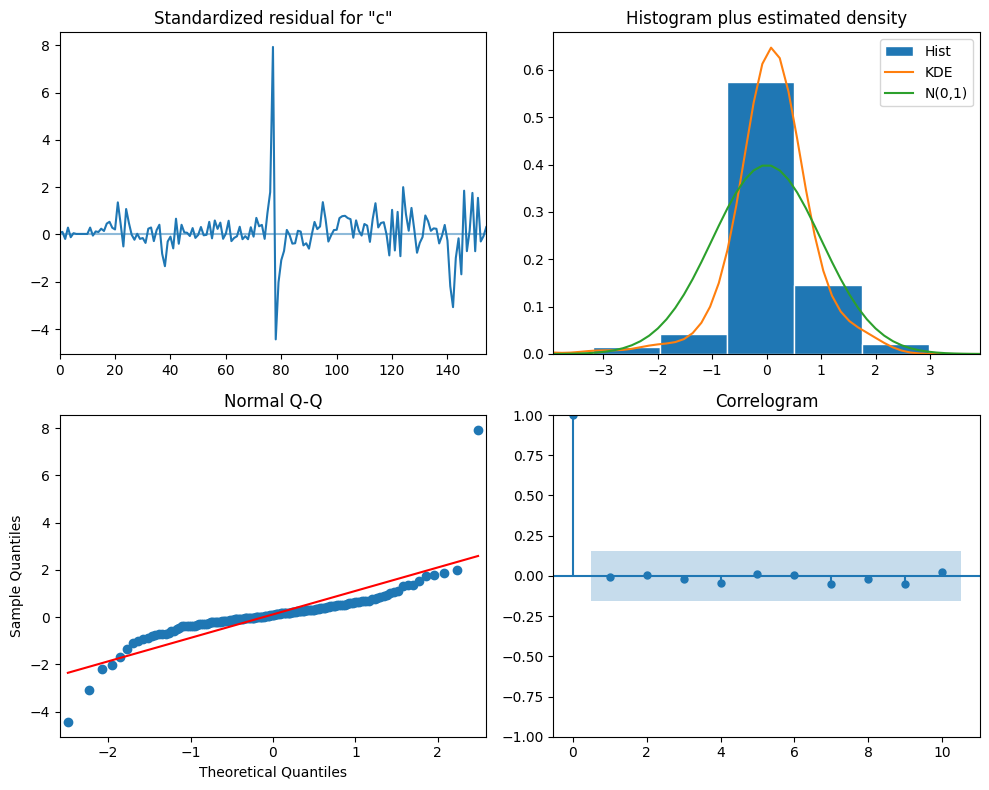

In [48]:
# Residuals
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

In [49]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = SARIMA_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 200, 1))

,lb_stat,lb_pvalue
1,78.227031,9.185294e-19
2,137.134331,1.665936e-30
3,176.646415,4.673570e-38
4,202.268141,1.222368e-42
5,216.935460,6.735501e-45
...,...,...
195,345.308049,1.838066e-10
196,345.330745,2.452169e-10
197,345.348778,3.266769e-10
198,345.354099,4.353420e-10


In [50]:
def rolling_forecast_sarima(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'last_season':
        pred_last_season = []

        for i in range(train_len, total_len, window):
            last_season = df['covid_numbers'][i-window:i].values
            pred_last_season.extend(last_season)

        return pred_last_season

    elif method == 'SARIMA':
        pred_SARIMA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df['covid_numbers'][:i], order=(3,0,0), seasonal_order=(2,1,1,52), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(end_idx, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMA.extend(oos_pred)

        return pred_SARIMA

# Initializing
sarima_pred=test[-45:]



In [51]:
sarima_pred['sarima']=rolling_forecast_sarima(Covid_series_dated, train.shape[0], 45, 3, 'SARIMA')

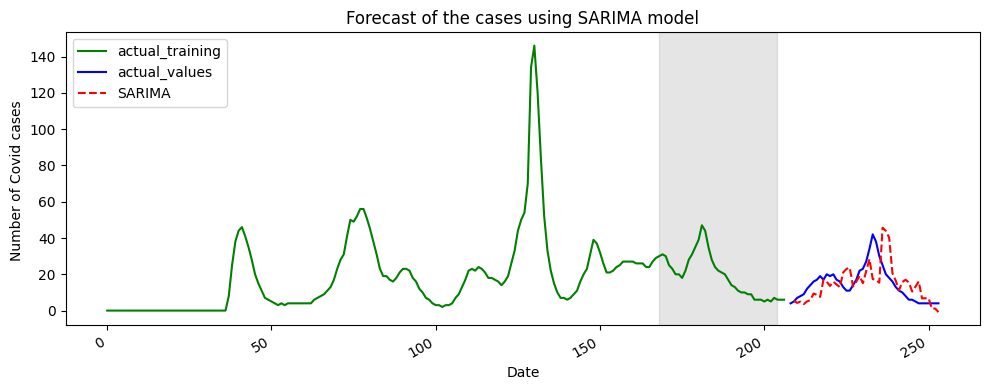

In [52]:
# SARIMA plot
fig, ax = plt.subplots()
plt.title("Forecast of the cases using SARIMA model")
ax.plot(train['covid_numbers'],'g-', label='actual_training')
ax.plot(pred_df['covid_numbers'], 'b-', label='actual_values')
ax.plot(sarima_pred.sarima, 'r--', label='SARIMA')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Covid cases ')
ax.axvspan(168, 204, color='#808080', alpha=0.2)
ax.legend(loc=2)

fig.autofmt_xdate()
plt.tight_layout()

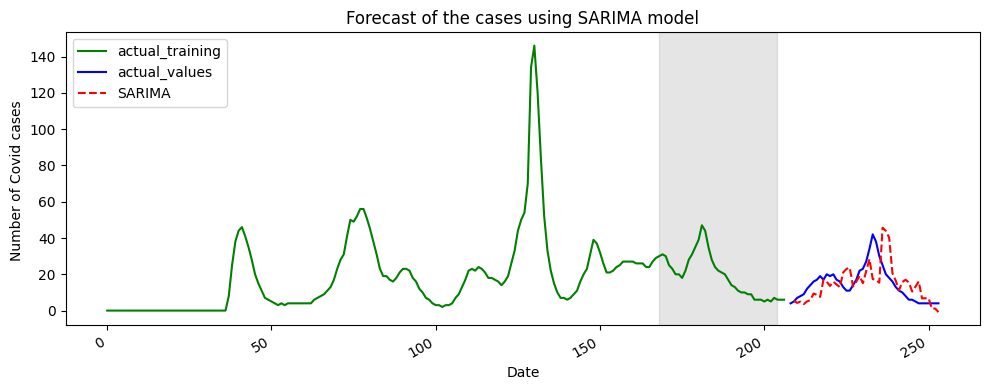

In [53]:
# SARIMA plot
fig, ax = plt.subplots()
plt.title("Forecast of the cases using SARIMA model")
ax.plot(train['covid_numbers'],'g-', label='actual_training')
ax.plot(pred_df['covid_numbers'], 'b-', label='actual_values')
ax.plot(sarima_pred.sarima, 'r--', label='SARIMA')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Covid cases ')
ax.axvspan(168, 204, color='#808080', alpha=0.2)
ax.legend(loc=2)


fig.autofmt_xdate()
plt.tight_layout()

In [54]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Comparing ARIMA, SARIMA, SARIMAX model alongwith naiive projections

In [55]:
## Forecasting with naiive seasonal
test['naive_seasonal'] = train['covid_numbers'].iloc[160:207].values

In [56]:
mape_ARIMA = mape(pred_df['covid_numbers'], pred_df['arima'])
mape_SARIMA = mape(sarima_pred['covid_numbers'], sarima_pred['sarima'])
mape_naive_seasonal=mape(test['covid_numbers'],test['naive_seasonal'])
print(mape_naive_seasonal, mape_SARIMA, mape_ARIMA )

94.80406285680112 61.92347636576238 22.833120039886058


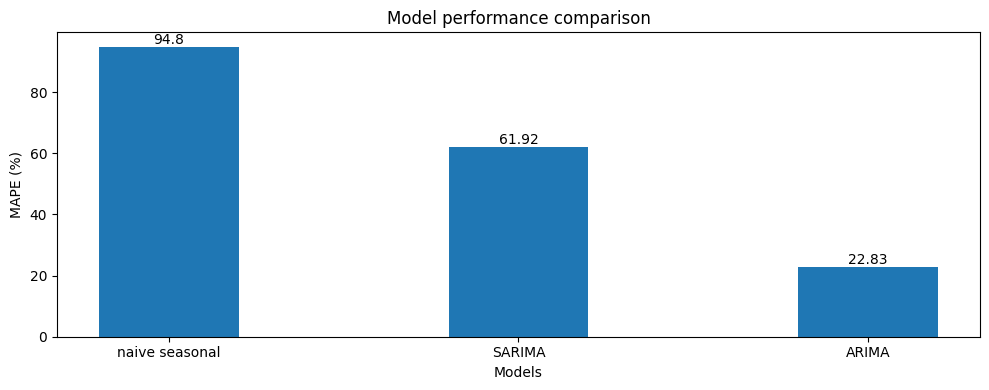

In [57]:
fig, ax = plt.subplots()
plt.title('Model performance comparison')

x = ['naive seasonal', 'SARIMA', 'ARIMA' ]
y = [mape_naive_seasonal, mape_SARIMA, mape_ARIMA ]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

## Exog model with wastewater

In [58]:
# Importing wastewater preprocessed data
wastewater_samples_data=pd.read_csv('wastewater_samples_data', index_col=0)

In [59]:
wastewater_samples_data.head(3)

,Sample collection date,Number of samples in the last 7 days,7 day average of SARS-CoV-2 concentration,SARS-CoV-2 Detected
0,2020-03-23,2,254896.998950,0
1,2020-03-24,2,346593.308500,0
2,2020-03-25,5,194182.999284,0


In [60]:
#Covid_series_dated=pd.read_csv('Covid_series_dated.csv')
Covid_series_dated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             254 non-null    object 
 1   Week Start Date    254 non-null    object 
 2   Week End Date      254 non-null    object 
 3   covid_numbers      254 non-null    float64
 4   rsv_numbers        254 non-null    float64
 5   influenza_numbers  254 non-null    float64
dtypes: float64(3), object(3)
memory usage: 12.0+ KB


In [61]:
Covid_series_dated['Week Start Date'] = pd.to_datetime(Covid_series_dated['Week Start Date'])
Covid_series_dated['Week End Date'] = pd.to_datetime(Covid_series_dated['Week End Date'])
wastewater_samples_data['Sample collection date'] = pd.to_datetime(wastewater_samples_data['Sample collection date'])

In [62]:
wastewater_samples_data.sort_values(by='Sample collection date')[:2]

,Sample collection date,Number of samples in the last 7 days,7 day average of SARS-CoV-2 concentration,SARS-CoV-2 Detected
0,2020-03-23,2,254896.99895,0
1,2020-03-24,2,346593.30850,0


In [63]:
wastewater_samples_data.sort_values(by='Sample collection date')[-2:]

,Sample collection date,Number of samples in the last 7 days,7 day average of SARS-CoV-2 concentration,SARS-CoV-2 Detected
1478,2024-06-09,31,494386.239224,0
1479,2024-06-10,35,482139.538986,0


In [64]:
Covid_series_dated['Week End Date'].sort_values()[:3]

0   2019-07-13
1   2019-07-20
2   2019-07-27
Name: Week End Date, dtype: datetime64[ns]

In [65]:
Covid_series_dated['Week End Date'].sort_values()[-3:]

251   2024-05-04
252   2024-05-11
253   2024-05-18
Name: Week End Date, dtype: datetime64[ns]

In [66]:
# The wastewater samples is till 2024-06-10 and Covid data is till 2024-05-18. Dropping all the values after 2024-05-18

index_drop=wastewater_samples_data[wastewater_samples_data['Sample collection date'] > '2024-05-18'].index

In [67]:
index_drop

Index([1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468,
       1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479],
      dtype='int64')

In [68]:
wastewater_samples_data=wastewater_samples_data.drop(index=index_drop)

In [69]:
wastewater_samples_data=wastewater_samples_data.sort_values(by='Sample collection date').reset_index(drop=True)

In [70]:
Covid_series_dated=Covid_series_dated.sort_values(by='Week End Date').reset_index(drop=True)

In [71]:
# Converting the  sample date to weekend date.
for ind2,row2 in wastewater_samples_data.iterrows():
  for ind1, row in Covid_series_dated.iterrows():
    start_date = row['Week Start Date']
    end_date = row['Week End Date']
    if (row2['Sample collection date'] >= start_date) & (row2['Sample collection date'] <= end_date):
       wastewater_samples_data.loc[ind2,'Sample collection date'] = end_date

#### Comparing end dates

In [72]:
Covid_series_dated['Week End Date'].nunique()

254

In [73]:
wastewater_samples_data['Sample collection date'].nunique()

217

In [74]:
wastewater_samples_data.columns

Index(['Sample collection date', 'Number of samples in the last 7 days',
       '7 day average of SARS-CoV-2 concentration', 'SARS-CoV-2 Detected'],
      dtype='object')

In [75]:
wastewater_samples_grouped = wastewater_samples_data.groupby(['Sample collection date']).agg({
    'Number of samples in the last 7 days': 'sum',
    '7 day average of SARS-CoV-2 concentration': 'mean',
    'SARS-CoV-2 Detected':'sum'

}).reset_index()

In [76]:
wastewater_samples_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Sample collection date                     217 non-null    datetime64[ns]
 1   Number of samples in the last 7 days       217 non-null    int64         
 2   7 day average of SARS-CoV-2 concentration  217 non-null    float64       
 3   SARS-CoV-2 Detected                        217 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.9 KB


# Merging the covid and watersamples data

In [77]:
Covid_series_dated.columns

Index(['Season', 'Week Start Date', 'Week End Date', 'covid_numbers',
       'rsv_numbers', 'influenza_numbers'],
      dtype='object')

In [78]:
cov_water=pd.merge(Covid_series_dated,wastewater_samples_grouped, left_on='Week End Date', right_on='Sample collection date' )



In [79]:
cov_water.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Season                                     217 non-null    object        
 1   Week Start Date                            217 non-null    datetime64[ns]
 2   Week End Date                              217 non-null    datetime64[ns]
 3   covid_numbers                              217 non-null    float64       
 4   rsv_numbers                                217 non-null    float64       
 5   influenza_numbers                          217 non-null    float64       
 6   Sample collection date                     217 non-null    datetime64[ns]
 7   Number of samples in the last 7 days       217 non-null    int64         
 8   7 day average of SARS-CoV-2 concentration  217 non-null    float64       
 9   SARS-CoV-2 Detected  

In [80]:
cov_water.to_csv('cov_water.csv')

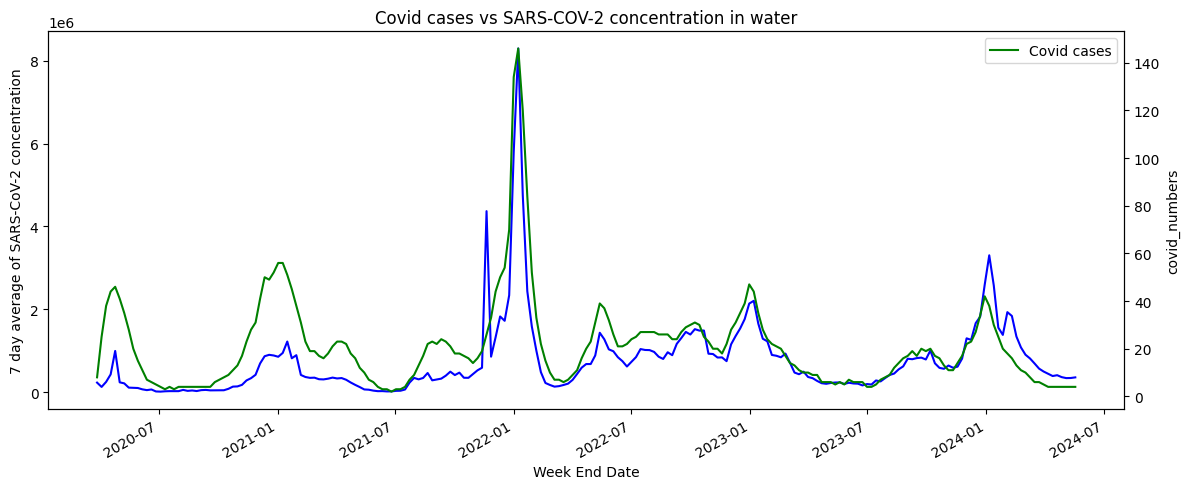

In [81]:
# Covid numbers and wastewater concentration plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.lineplot(cov_water, y='7 day average of SARS-CoV-2 concentration', x='Week End Date', color="b").set(title='Covid cases vs SARS-COV-2 concentration in water')
ax2 = plt.twinx()
sns.lineplot(cov_water, y='covid_numbers', x='Week End Date', color="g", ax=ax2, legend='brief', label='Covid cases')
plt.gcf().autofmt_xdate()
plt.show();

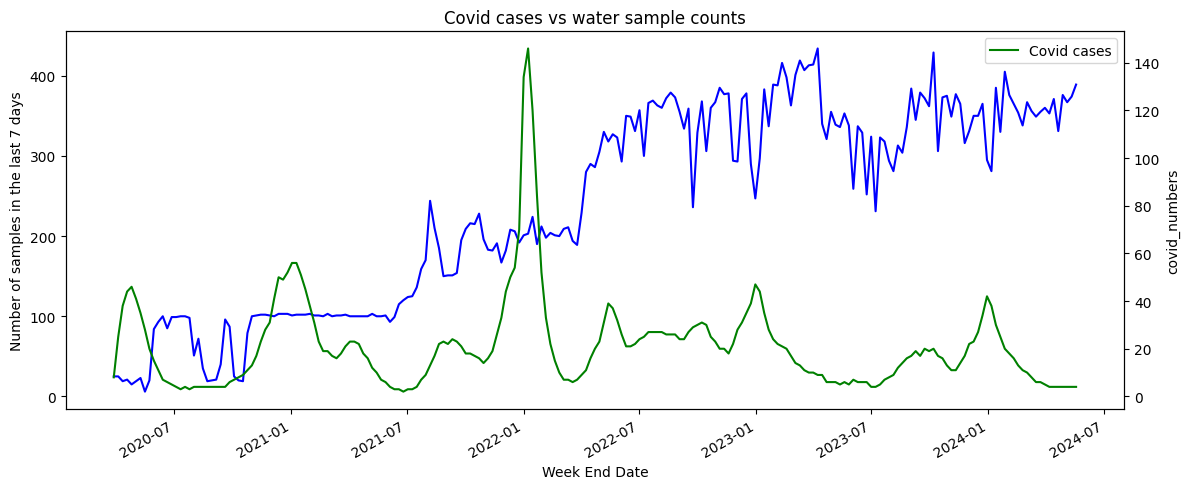

In [82]:
# Covid numbers and wastewater concentration plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.lineplot(cov_water, y='Number of samples in the last 7 days', x='Week End Date', color="b").set(title='Covid cases vs water sample counts')
ax2 = plt.twinx()
sns.lineplot(cov_water, y='covid_numbers', x='Week End Date', color="g", ax=ax2, legend='brief', label='Covid cases')
plt.gcf().autofmt_xdate()
plt.show();

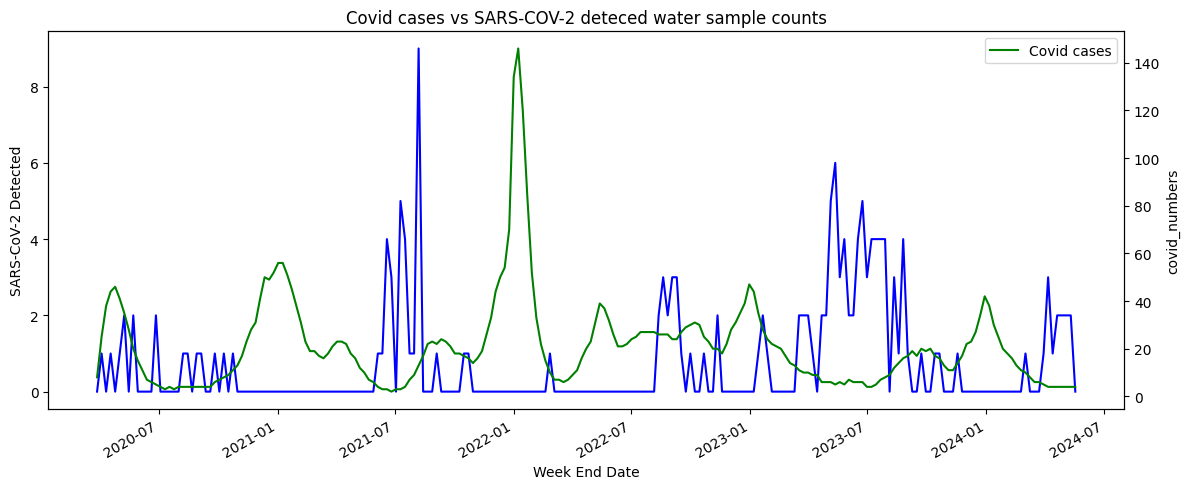

In [83]:
# Covid numbers and wastewater concentration plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.lineplot(cov_water, y='SARS-CoV-2 Detected', x='Week End Date', color="b").set(title='Covid cases vs SARS-COV-2 deteced water sample counts')
ax2 = plt.twinx()
sns.lineplot(cov_water, y='covid_numbers', x='Week End Date', color="g", ax=ax2, legend='brief', label='Covid cases')
plt.gcf().autofmt_xdate()
plt.show();

### SARIMAX model with exog as waste water feature

In [84]:
cov_water=cov_water[cov_water['Week End Date'] >='2022-05-01'].reset_index(drop=True)

In [85]:
cov_water.to_csv('cov_water.csv')

In [86]:
cov_water.columns

Index(['Season', 'Week Start Date', 'Week End Date', 'covid_numbers',
       'rsv_numbers', 'influenza_numbers', 'Sample collection date',
       'Number of samples in the last 7 days',
       '7 day average of SARS-CoV-2 concentration', 'SARS-CoV-2 Detected'],
      dtype='object')

In [87]:
cov_water.Season.unique()

array(['2021-2022', '2022-2023', '2023-2024'], dtype=object)

In [88]:
cov_water.Season.value_counts()

Season
2022-2023    52
2023-2024    46
2021-2022     9
Name: count, dtype: int64

In [89]:
# Creating test and train sets, choosing searson 2023-2034 as horizon to forecast.
#cov_water_train=cov_water[:171]
#cov_water_test=cov_water[171:]

cov_water_train=cov_water[:61]
cov_water_test=cov_water[61:]

In [90]:
cov_water_test.head(3)

,Season,Week Start Date,Week End Date,covid_numbers,rsv_numbers,influenza_numbers,Sample collection date,Number of samples in the last 7 days,7 day average of SARS-CoV-2 concentration,SARS-CoV-2 Detected
61,2023-2024,2023-07-02,2023-07-08,4.0,0.0,1.0,2023-07-08,231,187691.193921,4
62,2023-2024,2023-07-09,2023-07-15,5.0,0.0,0.0,2023-07-15,323,285192.988076,4
63,2023-2024,2023-07-16,2023-07-22,7.0,0.0,0.0,2023-07-22,318,261600.771124,4


In [91]:
# Verification for stationarity

ad_fuller_result = adfuller(cov_water_train['covid_numbers'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.2828644313080964
p-value: 0.1775541028141368


In [92]:
ad_fuller_result = adfuller(cov_water_train['7 day average of SARS-CoV-2 concentration'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.8918661807719687
p-value: 0.7906391982055891


### Both series have stationarity

In [93]:
#adding exogenous variable - option 1 with differencing on season
# SARIMAX Model
#SARIMAX_model = pm.auto_arima(cov_water_train[['covid_numbers']], exogenous=cov_water_train[['7 day average of SARS-CoV-2 concentration']],
#                           start_p=1, start_q=1,
#                           test='adf',
#                           max_p=30, max_q=30, m=1,
#                           start_P=0, seasonal=False,
#                           d=None, D=0,
#                           trace=False,
#                           error_action='ignore',
#                           suppress_warnings=True,
#                           stepwise=True)

In [94]:
#SARIMAX_model

In [95]:
### To insert best value here

SARIMAX_model = SARIMAX(cov_water_train[['covid_numbers']],cov_water_train[['7 day average of SARS-CoV-2 concentration']], order=(2,1,1), seasonal_order=(0,0,0,0), simple_differencing=False)
SARIMAX_model_fit = SARIMAX_model.fit(disp=False)

In [96]:
# Checking model summary
SARIMAX_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          covid_numbers   No. Observations:                   61
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -130.863
Date:                Wed, 07 May 2025   AIC                            271.727
Time:                        07:13:01   BIC                            282.199
Sample:                             0   HQIC                           275.823
                                 - 61                                         
Covariance Type:                  opg                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
7 day average of SARS-CoV-2 concentration  1.221e-05   1.39e-06      8.772      0.000    9.48e-06    1.49e-05
ar.L1                                             -0      0.059         -0      1.000      -0.115       0.115
ar.L2                                              0      0.132          0      1.000      -0.259       0.259
ma.L1                                              0      0.059          0      1.000      -0.115       0.115
sigma2                                        3.8372      0.596      6.442      0.000       2.670       5.005
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.56   Prob(JB):                         0.87
Heteroskedasticity (H):               0.64   Skew:                            -0.07
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.21e+16. Standard errors may be unstable.
"""

In [97]:
SARIMAX_model_fit.aic

271.7269813014811

In [98]:
SARIMAX_model_fit.params

7 day average of SARS-CoV-2 concentration    0.000012
ar.L1                                       -0.000000
ar.L2                                        0.000000
ma.L1                                        0.000000
sigma2                                       3.837209
dtype: float64

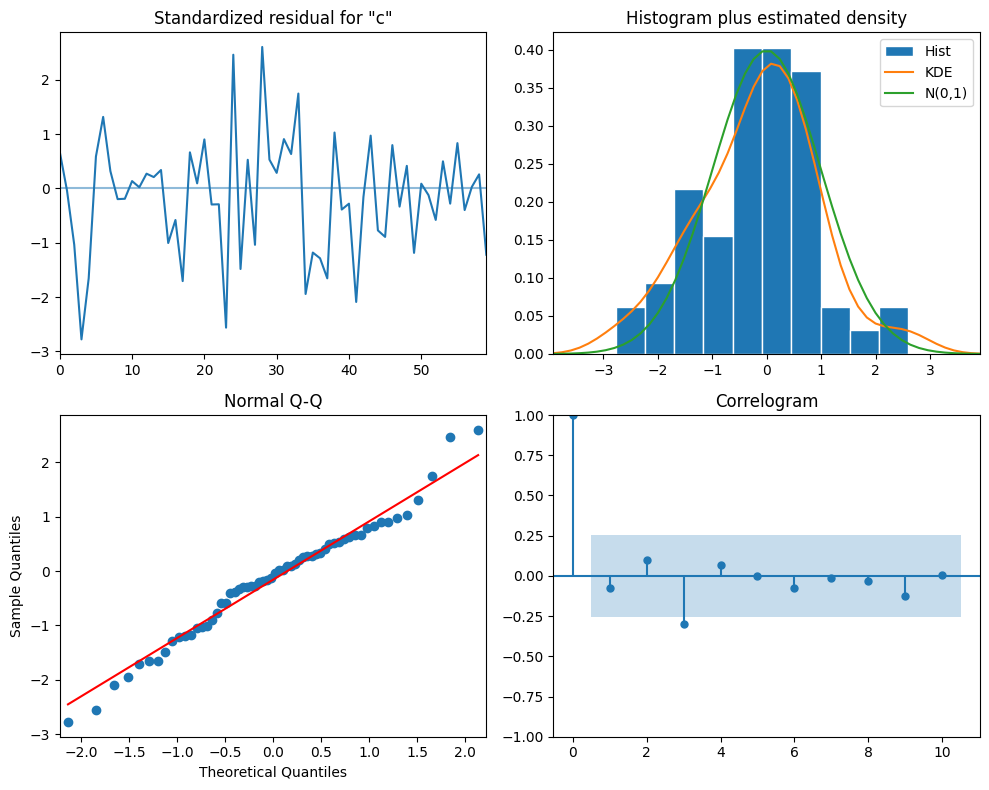

In [99]:
# Verifying residuals for normal distrobution
SARIMAX_model_fit.plot_diagnostics(figsize=(10,8));

In [100]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = SARIMAX_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 53, 1))

,lb_stat,lb_pvalue
1,0.023756,0.877508
2,0.153967,0.925905
3,2.079963,0.555977
4,3.196214,0.525543
5,3.766563,0.583490
6,3.772622,0.707415
7,4.205060,0.755879
8,4.219547,0.836792
9,4.427048,0.881129
10,4.427240,0.926022


## The residuals are not correlated as per ljungbox test and correlogram. Hence we can consider the wastewater as exog.

In [101]:
def rolling_forecast_exog(endog: Union[pd.Series, list], exog: Union[pd.Series, list], train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon

    if method == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method == 'SARIMAX':
        pred_SARIMAX = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(2,1,1), seasonal_order=(0,0,0,0), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)

        return pred_SARIMAX

In [102]:
pred_df_wastewater=cov_water_test

In [103]:
pred_last_value = rolling_forecast_exog(cov_water[['covid_numbers']], cov_water[['7 day average of SARS-CoV-2 concentration']],  61, 46, 2, 'last')
pred_SARIMAX = rolling_forecast_exog(cov_water[['covid_numbers']], cov_water[['7 day average of SARS-CoV-2 concentration']],  61, 46, 2, 'SARIMAX')

pred_df_wastewater['pred_last_value'] = pred_last_value
pred_df_wastewater['pred_SARIMAX'] = pred_SARIMAX


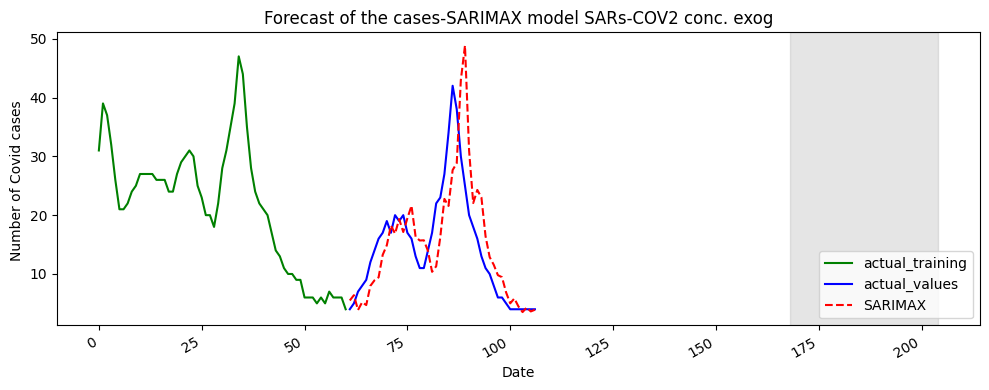

In [104]:
# SARIMAX plot
fig, ax = plt.subplots()
plt.title("Forecast of the cases-SARIMAX model SARs-COV2 conc. exog")
ax.plot(cov_water_train['covid_numbers'],'g-', label='actual_training')
ax.plot(pred_df_wastewater['covid_numbers'], 'b-', label='actual_values')
ax.plot(pred_df_wastewater['pred_SARIMAX'], 'r--', label='SARIMAX')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Covid cases ')
ax.axvspan(168, 204, color='#808080', alpha=0.2)
ax.legend(loc=4)


fig.autofmt_xdate()
plt.tight_layout()

## Model with 2 exogs

In [105]:
# Taking SARs count of positive samples as exog

In [106]:
ad_fuller_result = adfuller(cov_water['SARS-CoV-2 Detected'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.2384961851264267
p-value: 0.017861742935051404


# SARS-CoV-2 Detected series also has stationarity.

In [107]:
#adding exogenous variable - option 1 with differencing on season
# SARIMAX Model
#SARIMAX_model_2 = pm.auto_arima(cov_water_train[['covid_numbers']], exogenous=cov_water_train[['7 day average of SARS-CoV-2 concentration', 'SARS-CoV-2 Detected']],
#                           start_p=1, start_q=1,
#                           test='adf',
#                           max_p=30, max_q=30, m=1,
#                           start_P=0, seasonal=False,
#                           d=None, D=0,
#                           trace=False,
#                           error_action='ignore',
#                           suppress_warnings=True,
#                           stepwise=True)

In [108]:
# Best parmeters
#SARIMAX_model_2

In [109]:
### To insert best value here

SARIMAX_model_2 = SARIMAX(cov_water_train[['covid_numbers']],cov_water_train[['7 day average of SARS-CoV-2 concentration', 'SARS-CoV-2 Detected']], order=(2,1,1), seasonal_order=(0,0,0,0), simple_differencing=False)
SARIMAX_model_2_fit = SARIMAX_model_2.fit(disp=False)

# Checking model summary
SARIMAX_model_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          covid_numbers   No. Observations:                   61
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -130.523
Date:                Wed, 07 May 2025   AIC                            273.045
Time:                        07:13:04   BIC                            285.611
Sample:                             0   HQIC                           277.961
                                 - 61                                         
Covariance Type:                  opg                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
7 day average of SARS-CoV-2 concentration  1.205e-05   1.37e-06      8.780      0.000    9.36e-06    1.47e-05
SARS-CoV-2 Detected                          -0.2356      0.286     -0.825      0.410      -0.795       0.324
ar.L1                                             -0      0.058         -0      1.000      -0.113       0.113
ar.L2                                              0      0.130          0      1.000      -0.256       0.256
ma.L1                                              0      0.058          0      1.000      -0.113       0.113
sigma2                                        3.7222      0.590      6.305      0.000       2.565       4.879
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.56   Prob(JB):                         0.88
Heteroskedasticity (H):               0.59   Skew:                            -0.12
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.64e+17. Standard errors may be unstable.
"""

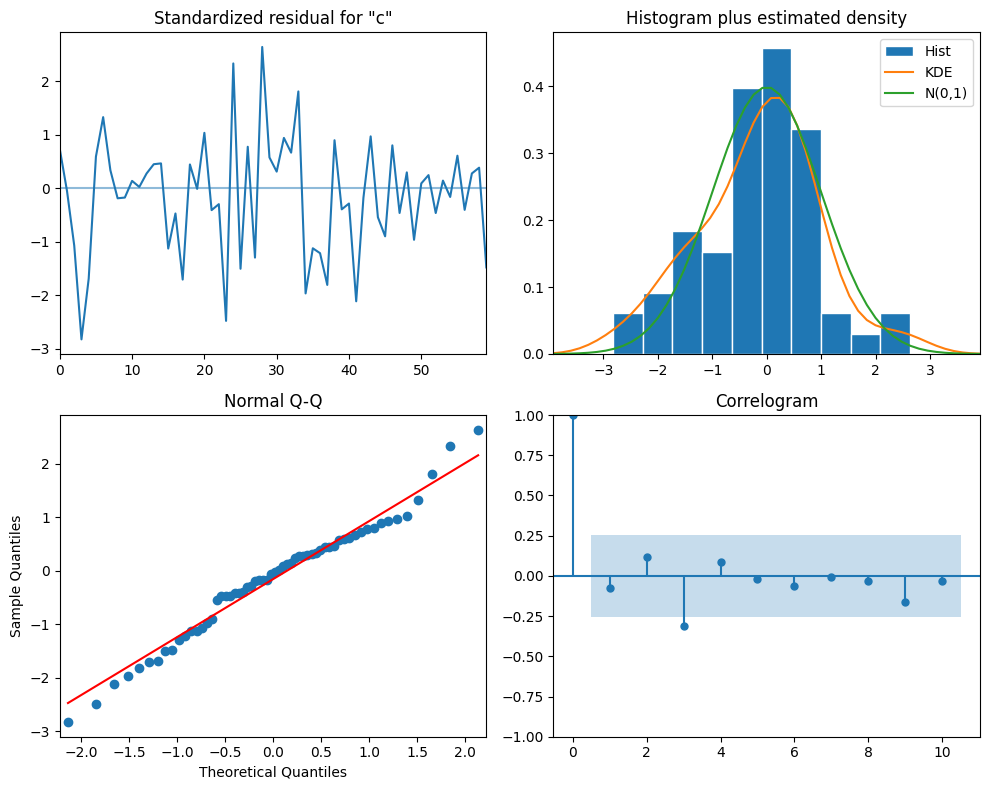

In [110]:
# Verifying residuals for normal distrobution
SARIMAX_model_2_fit.plot_diagnostics(figsize=(10,8));

In [111]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = SARIMAX_model_2_fit.resid
acorr_ljungbox(residuals)


,lb_stat,lb_pvalue
1,0.031234,0.859720
2,0.198876,0.905346
3,2.194824,0.532969
4,3.219422,0.521800
5,3.914252,0.561827
6,3.928708,0.686324
7,4.373827,0.735853
8,4.387100,0.820619
9,4.712445,0.858620
10,4.730507,0.908438


#### The residuals are not correlated as per ljungbox test and correlogram. Hence we can consider just the wastewater SAR-cov2 concentration and  count of samples detected positive for covid as  exog.

In [112]:
pred_last_value = rolling_forecast_exog(cov_water[['covid_numbers']], cov_water[['7 day average of SARS-CoV-2 concentration', 'SARS-CoV-2 Detected']],  61, 46, 2, 'last')
pred_SARIMAX = rolling_forecast_exog(cov_water[['covid_numbers']], cov_water[['7 day average of SARS-CoV-2 concentration','SARS-CoV-2 Detected']],  61, 46, 2, 'SARIMAX')

pred_df_wastewater['pred_SARIMAX_2'] = pred_SARIMAX

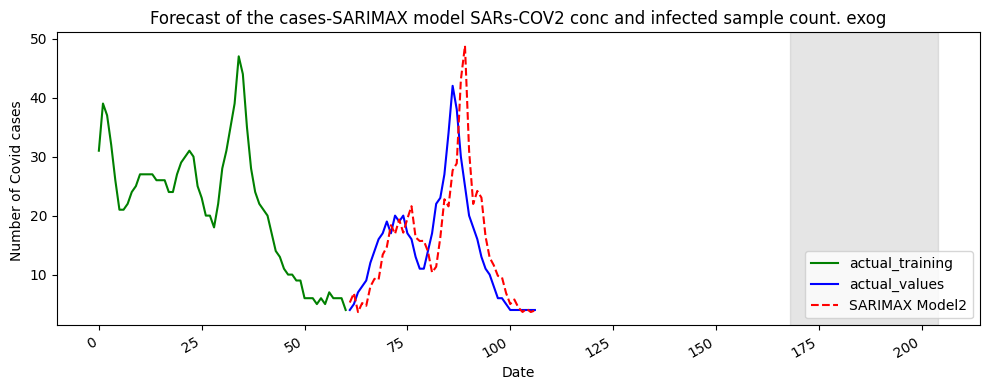

In [113]:
# SARIMA plot
fig, ax = plt.subplots()
plt.title("Forecast of the cases-SARIMAX model SARs-COV2 conc and infected sample count. exog")
ax.plot(cov_water_train['covid_numbers'],'g-', label='actual_training')
ax.plot(pred_df_wastewater['covid_numbers'], 'b-', label='actual_values')
ax.plot(pred_df_wastewater['pred_SARIMAX_2'], 'r--', label='SARIMAX Model2')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Covid cases ')
ax.axvspan(168, 204, color='#808080', alpha=0.2)
ax.legend(loc=4)


fig.autofmt_xdate()
plt.tight_layout()

## Exog model comparisons

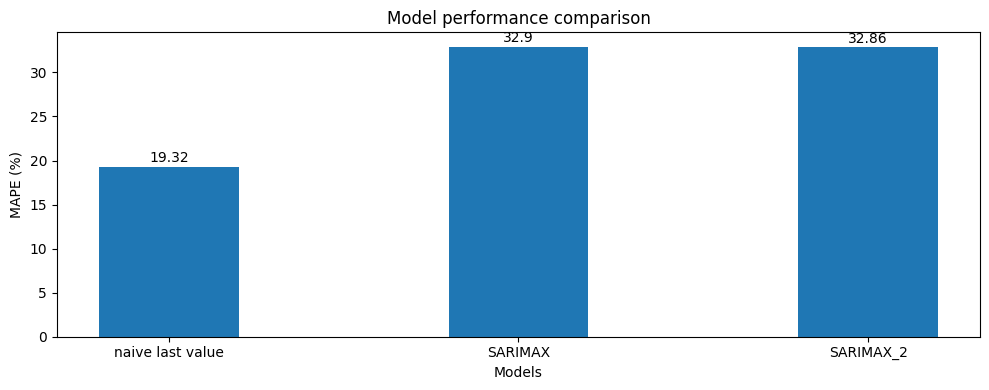

In [114]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_last = mape(pred_df_wastewater['covid_numbers'], pred_df_wastewater['pred_last_value'])
mape_SARIMAX = mape(pred_df_wastewater['covid_numbers'], pred_df_wastewater['pred_SARIMAX'])
mape_SARIMAX_2 = mape(pred_df_wastewater['covid_numbers'], pred_df_wastewater['pred_SARIMAX_2'])

fig, ax = plt.subplots()
plt.title('Model performance comparison')

x = ['naive last value', 'SARIMAX', 'SARIMAX_2']
y = [mape_last, mape_SARIMAX, mape_SARIMAX_2]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.5, s=str(round(value,2)), ha='center')

plt.tight_layout()

## VAR model using wastewater analysis data

In [115]:
ad_fuller_result_1 = adfuller(cov_water['covid_numbers'])
print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(cov_water['7 day average of SARS-CoV-2 concentration'])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realdpi
ADF Statistic: -3.324600971705239
p-value: 0.013813990318679763

---------------------

realcons
ADF Statistic: -3.019530086182302
p-value: 0.03311035246297346


In [116]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.varmax import VARMAX

def optimize_VAR(endog: Union[pd.Series, list]) -> pd.DataFrame:

    results = []
    for i in tqdm_notebook(range(52)):
      try:
        model = VARMAX(endog, order=(i, 0)).fit(dips=False)
      except:
          continue
      aic = model.aic
      results.append([i, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['p', 'AIC']
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [117]:
result_df = optimize_VAR(cov_water_train[['covid_numbers', '7 day average of SARS-CoV-2 concentration']])
result_df

  0%|          | 0/52 [00:00<?, ?it/s]

,p,AIC
0,3,1.908506e+03
1,4,1.908560e+03
2,6,1.909106e+03
3,5,1.911399e+03
4,7,1.911451e+03
5,8,1.915100e+03
6,10,1.927106e+03
7,1,1.928695e+03
8,11,1.935782e+03
9,17,2.112440e+03


In [118]:
# Import Granger causality test utility
from statsmodels.tsa.stattools import grangercausalitytests

In [119]:
# Best p value is 11

print('SARs-Cov2 conc causes Granger-causes Covid?\n')
print('------------------')
granger_1 = grangercausalitytests(cov_water_train[['covid_numbers', '7 day average of SARS-CoV-2 concentration']].diff()[11:], [3])

print('\nCovid numbers Granger-causes SARS-Cov2-conc?\n')
print('------------------')
granger_2 = grangercausalitytests(cov_water_train[['7 day average of SARS-CoV-2 concentration', 'covid_numbers']].diff()[11:], [3])

SARs-Cov2 conc causes Granger-causes Covid?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6905  , p=0.5632  , df_denom=40, df_num=3
ssr based chi2 test:   chi2=2.4339  , p=0.4874  , df=3
likelihood ratio test: chi2=2.3729  , p=0.4987  , df=3
parameter F test:         F=0.6905  , p=0.5632  , df_denom=40, df_num=3

Covid numbers Granger-causes SARS-Cov2-conc?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=12.0963 , p=0.0000  , df_denom=40, df_num=3
ssr based chi2 test:   chi2=42.6393 , p=0.0000  , df=3
likelihood ratio test: chi2=30.3454 , p=0.0000  , df=3
parameter F test:         F=12.0963 , p=0.0000  , df_denom=40, df_num=3


## Observation: Since Granger causality does not show covid numbers dependent on SAR-Cov2 concentration, we need to use SARIMAX model.
## Both the series should have causality shown by Grangercausality utility.

In [120]:
# END